In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [12]:
D = 3 
N = 1e7
resdir = 'nsc-s1Ne7' #'nsc-s1' # 'nsc-s1Ne7'
s = 1.0
L = 1.0
n_perms = 10
nlist = [0.5, 1, 2, 5, 10, 20]
sclist = [0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99]
dpi = 70
tis_np = np.zeros((len(nlist), len(sclist), n_perms))
wis_np = np.zeros((len(nlist), len(sclist), n_perms))
numCivs_np = np.zeros((len(nlist), len(sclist), n_perms))
"""
for nix, n in enumerate(nlist):
    for scix,sc in enumerate(sclist):
        c = s / sc
        tfreqs_cur = np.zeros((n_perms, n_tintervals))

        for randix in range(n_perms):
            fout = (
                f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
                f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
            )
            a = pd.read_csv(fout)
            numCivs_np[nix, scix, randix] = a.shape[0]
            tis_np[nix, scix, randix] = 
numCivs = pd.DataFrame(
    data=np.mean(numCivs_np, axis=2), columns=sclist, index=nlist)
""";

In [3]:
n = 5
randix = 0


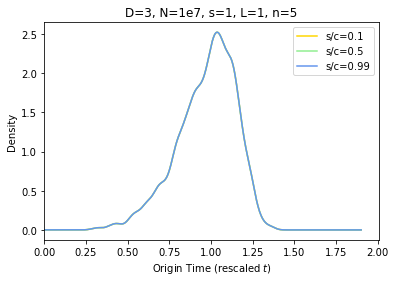

In [11]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
sc_cols = [(0.1, 'gold'), (0.5, 'lightgreen'), (0.99, 'cornflowerblue')]
for sc,color in sc_cols:
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    a = pd.read_csv(fout)
    ax = (a.OriginTime / a.OriginTime.median()).plot.kde(bw_method=0.15, c=color)
ax.set_xlabel('Origin Time (rescaled $t$)')
ax.legend([f's/c={sc_cols[0][0]:.2}', f's/c={sc_cols[1][0]:.2}', f's/c={sc_cols[2][0]:.2}'])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title('D=3, N=1e7, s=1, L=1, n=5');

10.0
2.0
1.0101010101010102


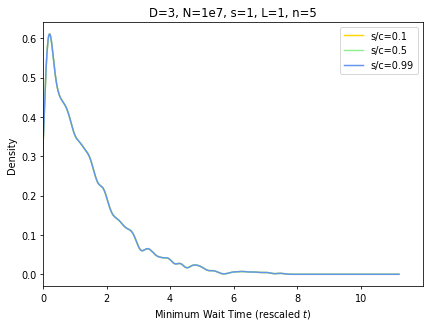

In [19]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
sc_cols = [(0.1, 'gold'), (0.5, 'lightgreen'), (0.99, 'cornflowerblue')]
for sc,color in sc_cols:
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    print(c)
    a = pd.read_csv(fout)
    ax = (a.MinWait / a.MinWait.median()).plot.kde(bw_method=0.1, c=color)
ax.set_xlabel('Minimum Wait Time (rescaled $t$)')
ax.legend([f's/c={sc_cols[0][0]:.2}', f's/c={sc_cols[1][0]:.2}', f's/c={sc_cols[2][0]:.2}'])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title('D=3, N=1e7, s=1, L=1, n=5');
fig.savefig('univariate-s-MinWait.png');

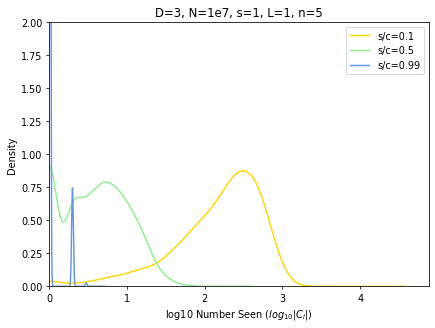

In [17]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
sc_cols = [(0.1, 'gold'), (0.5, 'lightgreen'), (0.99, 'cornflowerblue')]
for sc,color in sc_cols:
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    a = pd.read_csv(fout)
    ax = np.log10(a.NumberSeen+1).plot.kde(bw_method='silverman', c=color)
ax.set_xlabel('log10 Number Seen ($log_{10} |C_i|$)')
ax.legend([f's/c={sc_cols[0][0]:.2}', f's/c={sc_cols[1][0]:.2}', f's/c={sc_cols[2][0]:.2}'])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_ylim(0, 2)
ax.set_title('D=3, N=1e7, s=1, L=1, n=5');
#fig.tight_layout()
fig.savefig('univariate-s-NumberSeen.png');

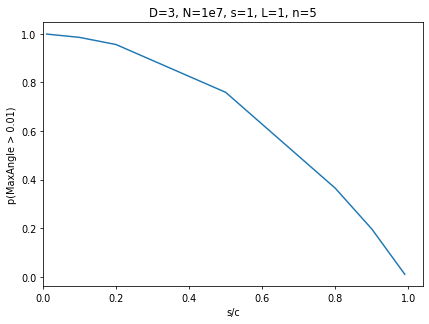

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), dpi=dpi)
sc_cols = [(0.1, 'gold'), (0.5, 'lightgreen'), (0.99, 'cornflowerblue')]
res_df = pd.DataFrame()
for sc in sclist:
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    a = pd.read_csv(fout)
    res_df[sc] = pd.Series((a.MaxAngle > 0.01).mean())
res_df.T.plot(ax=ax)
ax.set_xlabel('log10 Number Seen ($log_{10} |C_i|$)')
#ax.legend([f's/c={sc_cols[0][0]:.2}', f's/c={sc_cols[1][0]:.2}', f's/c={sc_cols[2][0]:.2}'])
ax.set_ylabel('p(MaxAngle > 0.01)')
ax.get_legend().remove()
ax.set_xlabel('s/c')
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title('D=3, N=1e7, s=1, L=1, n=5');
fig.savefig('univariate-s-pMaxAngle.png');